In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1449601597,1.000371,0.007671,-0.016173,0.027860,0.998221,1.000739,1.003265,0.891038,6.684582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1449601657,1.000243,0.003782,-0.002713,0.007046,0.998463,1.000373,1.002088,1.647929,6.684605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,1449601717,1.000811,0.002082,-0.001922,0.003575,0.999653,1.000928,1.002032,1.960286,6.684610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,1449601777,1.001245,0.004715,-0.002895,0.008881,0.999188,1.001425,1.003500,1.614524,6.684601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,1449601855,1.001354,0.065186,-0.096520,0.165298,1.000807,1.002259,1.003631,0.837790,6.682252,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,1449859467,1.002591,0.001446,0.000142,0.001900,1.001562,1.002603,1.003569,2.401218,6.684611,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2
3956,1449859527,1.002673,0.001349,-0.000593,0.001731,1.001677,1.002749,1.003635,2.593006,6.684611,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2
3957,1449859587,1.002523,0.028048,0.027043,0.076903,1.001037,1.002792,1.004425,0.509456,6.684221,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2
3958,1449859647,1.002590,0.005246,-0.001691,0.008700,1.000274,1.002775,1.005013,1.941774,6.684598,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2


In [4]:
relevant_columns = ['location:log_latitude_range', 'location:log_longitude_range']
data = df[relevant_columns]

data.dropna(inplace=True)
scaler = StandardScaler()
location_data_scaled = scaler.fit_transform(data[['location:log_latitude_range', 'location:log_longitude_range']])
km = KMeans(n_clusters=3)
km.fit(location_data_scaled)

C:\Users\DURRANI\AppData\Local\Temp\ipykernel_924\3255676997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [5]:
km.cluster_centers_

array([[ 1.09135089,  1.23598117],
       [-0.31864323, -0.34222916],
       [ 3.45972627,  3.54177556]])

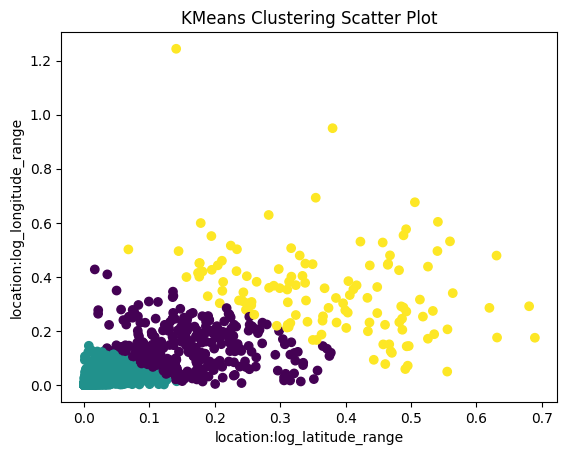

In [6]:
cluster_labels = km.labels_

plt.scatter(data['location:log_longitude_range'], data['location:log_latitude_range'], c=cluster_labels)
plt.xlabel('location:log_latitude_range')
plt.ylabel('location:log_longitude_range')
plt.title('KMeans Clustering Scatter Plot')
plt.show()

C:\Users\DURRANI\AppData\Local\Temp\ipykernel_924\2114972262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DURRANI\AppData\Local\Temp\ipykernel_924\2114972262.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_da

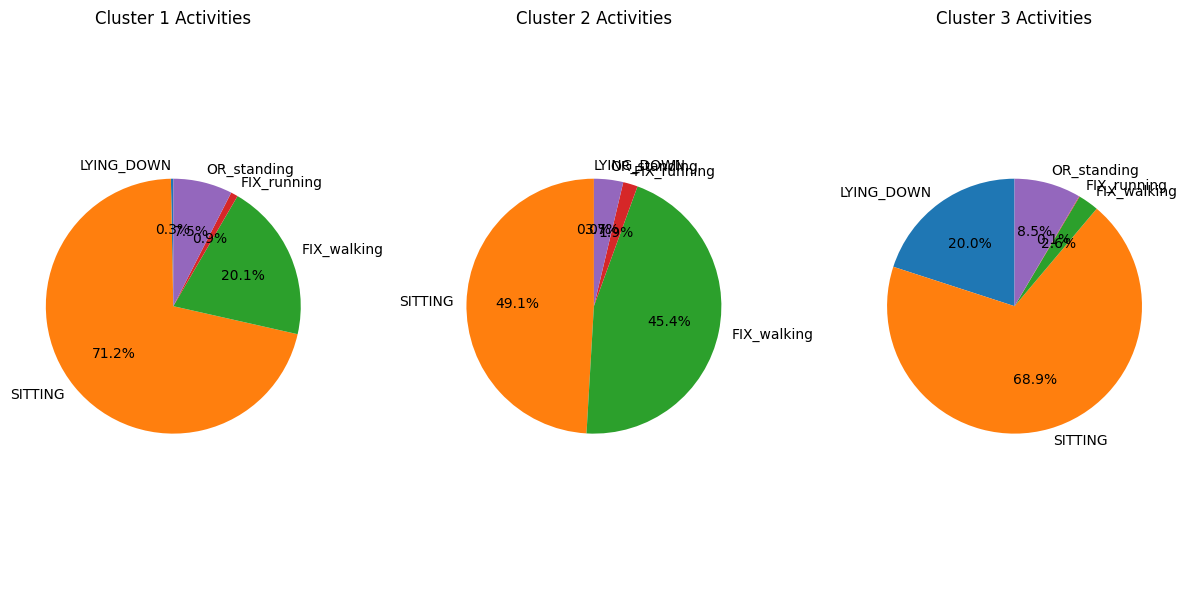

In [10]:
relevant_columns = ['location:log_latitude_range', 'location:log_longitude_range',
                    'label:LYING_DOWN', 'label:SITTING', 'label:FIX_walking',
                    'label:FIX_running', 'label:OR_standing']

filtered_data = df[relevant_columns]

filtered_data.dropna(inplace=True)

scaler = StandardScaler()
location_data_scaled = scaler.fit_transform(filtered_data[['location:log_latitude_range', 'location:log_longitude_range']])

kmeans = KMeans(n_clusters=3)
kmeans.fit(location_data_scaled)

filtered_data['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))

cluster_activities = filtered_data.groupby('Cluster')[['label:LYING_DOWN', 'label:SITTING', 'label:FIX_walking',
                                                       'label:FIX_running', 'label:OR_standing']].sum()

cluster_activity_percentages = {}
for cluster in range(3):
    total_activities = cluster_activities.iloc[cluster].sum()
    cluster_activity_percentages[cluster] = list((count / total_activities) * 100
                                             for count in cluster_activities.iloc[cluster])

for i, (cluster, percentages) in enumerate(cluster_activity_percentages.items(), start=1):
    plt.subplot(1, 3, i)
    labels = ['LYING_DOWN', 'SITTING', 'FIX_walking', 'FIX_running', 'OR_standing']
    plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Cluster {cluster+1} Activities')

plt.tight_layout()
plt.show()